# OUTLIERS & CARDINALITY & RARE

##### What is an outlier / cardinality / rare?
In NUMERIC data:
- an OUTLIER is a data point which is significantly different from the remaining data
- may be caused by: data entry errors, measurement errors, experimental errors, intentional, data processing errors, sampling errors, natural
- can be 2 types: univariate or multivariate outliers
    - univariate outliers can be found when looking at a distribution of values in a single feature space
    - multivariate outliers can be found in a n-dimensional space (of n-features).
- outlier may be: outlier detection (ie odd one out) OR anomaly detection (ie financial fraud, fake news, healthcare analysis, surveillance, sports)
- impact of outliers: change results of model and analysis, error variance (reduces power of statistical test), normality decreases, bias (influence estimates that may be of substansive interest), assumption (impact basic regression model and other assumptions)
- Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations.

In CATEGORICAL data:
- CARDINALITY is the number of different labels in a column. 
- RARE is where there is a low occurrence of one or more of those labels.

# --------------------------------------------------------------------------------------------------------------

### NUMERIC DATA

## 1. Visualize Data - univariate and multivariate

### Univariate data
data with 1 variable

##### Baseline model, start with simple approach (histogram, QQ plot, boxplot)
    - If your histogram is roughly symmetrical, it is safe to assume that the data is relatively normally distributed, and a parametric test will be appropriate. 
    - If the histogram is not symmetrical, then a nonparametric test will be more appropriate.
    - It can sometimes be difficult to assess whether a continuous outcome follows a normal distribution.  

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can use boxplots to directly visualise the outliers. Generally the boxplot is by far the least informative; it gives only a few pieces of information about the whole sample which leads to dangers of them being quite misleading about what you have. (see the figure below)

Histogram:

can be more informative but typical default settings use far too few bins.

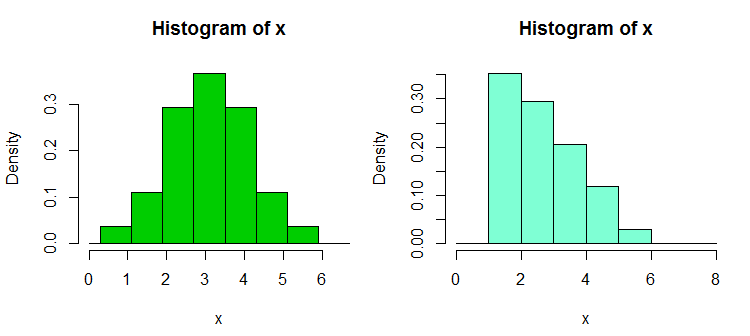

QQ plot:

'the plot just tells you that "something is wrong"', which is often the best way to use a qq-plot (as it can be difficult to understand how to interpret them). it may be difficult to understand

- if both tails twist counterclockwise you have heavy tails (leptokurtosis)
- if both tails twist clockwise, you have light tails (platykurtosis)
- if your right tail twists counterclockwise and your left tail twists clockwise, you have right skew
- if your left tail twists counterclockwise and your right tail twists clockwise, you have left skew

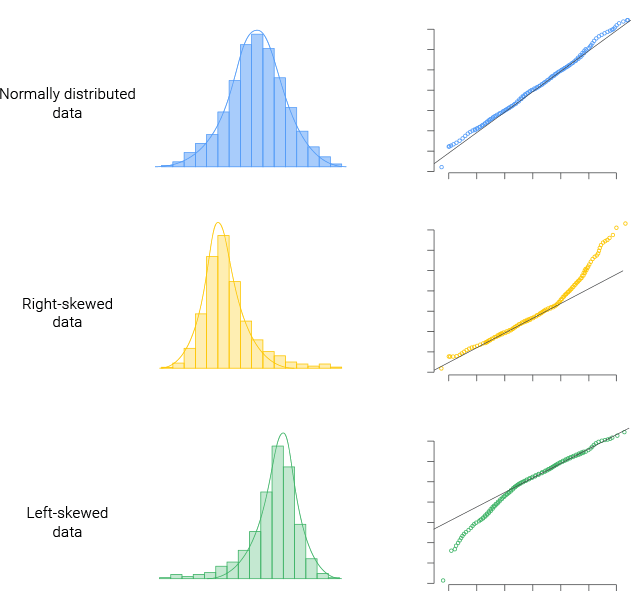

Boxplot:
- The median, indicated by the line within the box.
- The inter-quantile range (IQR), the box itself.
    - The quantiles, 25th (Q1) is the lower and 75th (Q3) the upper end of the box.
- The whiskers, which extend to: 
  -- top whisker: Q3 + 1.5 x IQR
  -- bottom whisker: Q1 -1.5 x IQR
  - Any value sitting outside the whiskers is considered an outlier
  
From the second figure, as we see there, very different-looking histograms (which in this case are mostly showing you what's going on, though they do obscure some particular features) correspond to identical boxplots.

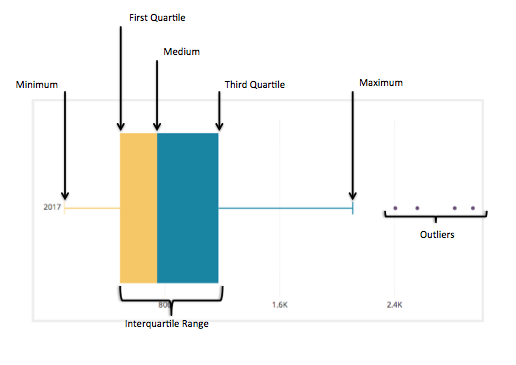

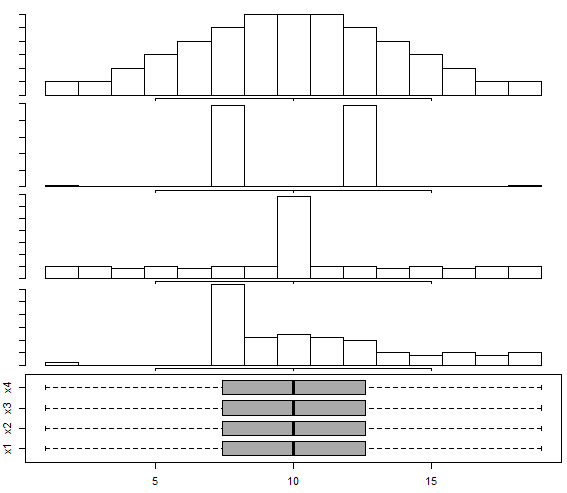

##### Visualize 1-D data

In [1]:
# function to create histogram, Q-Q plot and boxplot

# import libraries
import scipy.stats as stats

# create a function
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
# let's start with the variable RM (ave # of rooms/ dwelling) from the boston house dataset.
# Then can check other variables

diagnostic_plots(boston, 'RM')

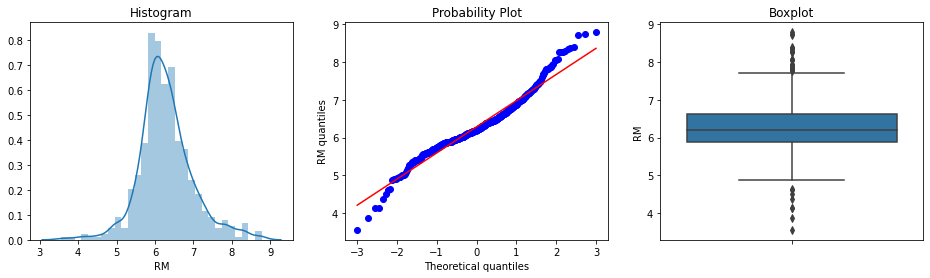

List observations about the data:

From above
- the histogram and the Q-Q plot, we see that the variable rm approximates a Gaussian distribution quite well
- in the boxplot, we see that the variable could have outliers, as there are many dots sitting outside the whiskers, at both tails of the distribution

In [ ]:
# can also use a scatterplot to visualize

plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

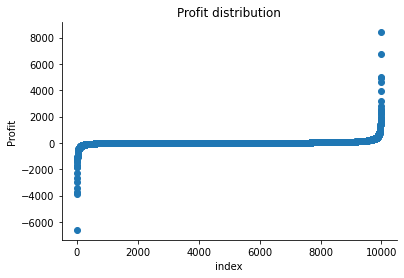

In [ ]:
# put here how to loop through several variables and create boxplot?
# think i create a list of all the columns and use loop funtion???

In [ ]:
# ADJUSTED BOXPLOT
# https://stackoverflow.com/questions/38163562/adjusted-boxplot-in-python

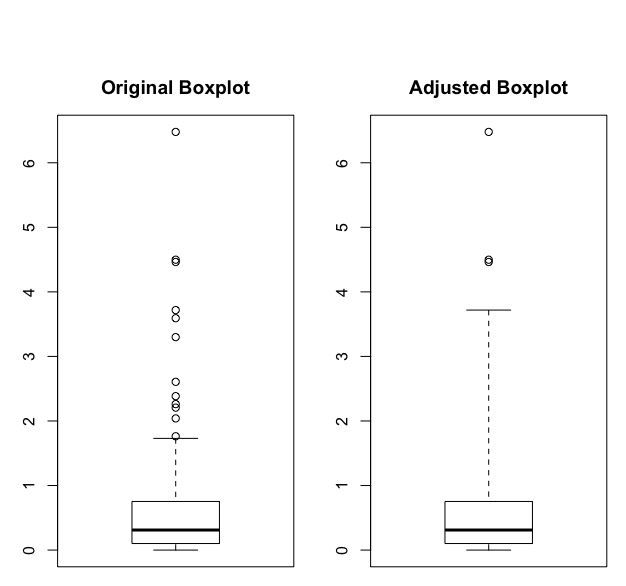

### Multivariate Data
- data with more than 1 variable

##### Can visualize multivariate data with a scatterplot

In [ ]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

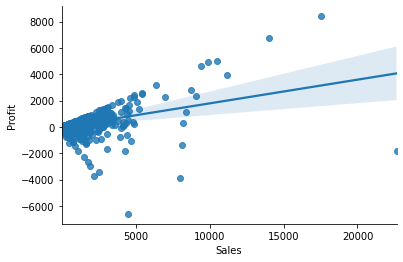

## 2. Identify outliers more precisely

##### Masking and Swamping
Masking can occur when we specify too few outliers in the test. For example, if we are testing for a single outlier when there are in fact two (or more) outliers, these additional outliers may influence the value of the test statistic enough so that no points are declared as outliers.
On the other hand, swamping can occur when we specify too many outliers in the test. For example, if we are testing for two or more outliers when there is in fact only a single outlier, both points may be declared outliers (many tests will declare either all or none of the tested points as outliers).

Due to the possibility of masking and swamping, it is useful to complement formal outlier tests with graphical methods. Graphics can often help identify cases where masking or swamping may be an issue. Swamping and masking are also the reason that many tests require that the exact number of outliers being tested must be specified.

Also, masking is one reason that trying to apply a single outlier test sequentially can fail. For example, if there are multiple outliers, masking may cause the outlier test for the first outlier to return a conclusion of no outliers (and so the testing for any additional outliers is not performed).

##### MAD (or median absolute deviation)
The median absolute deviation is a measure of statistical dispersion. Moreover, the MAD is a robust statistic, being more resilient to outliers in a data set than the standard deviation. In the standard deviation, the distances from the mean are squared, so large deviations are weighted more heavily, and thus outliers can heavily influence it. In the MAD, the deviations of a small number of outliers are irrelevant.

### Univariate outlier detection

In [ ]:
# List actual values for outliers for normally distributed univariate variables 
# First part is to define a function

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
# Second part of outlier detection for normally distributed univariate variables
# calculate boundaries for variable RM (can do for all variables)
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
print('upper boundary is: {}'.format(len(upper_boundary)))
print('lower boundary is: {}'.format(len(lower_boundary)))

# list the number and percentage of outliers for RM
print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

In [ ]:
# Outlier detection using STANDARD DEVIATION (aka THREE SIGMA) for normally distributed univariate
data_mean, data_std = mean(data), std(data)
# outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

In [2]:
# Outlier detection using Interquartile Range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

seed(1)
data = 5 * randn(10000) + 50

# interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 = q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=46.685, IQR=46.685
Identified outliers: 0
Non-outlier observations: 10000


In [ ]:
# Outlier detection for skewed univariate variables using IQR multiplied by a value
# First part is to define a function to find upper and lower boundaries

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# looking for outliers, using the interquantile proximity rule IQR * 1.5, the standard metric
# Second part is to list the values

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
print('upper boundary is: {}'.format(len(upper_boundary)))
print('lower boundary is: {}'.format(len(lower_boundary)))

# OR CAN USE
# looking for outliers, using the interquantile proximity rule IQR * 3, now I am looking for extremely high values
upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
print('upper boundary is: {}'.format(len(upper_boundary)))
print('lower boundary is: {}'.format(len(lower_boundary)))

# lets look at the number and percentage of outliers
# for LSTAT

print('total houses: {}'.format(len(boston)))

print('houses with LSTAT above upper boundary: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT below upper boundary: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

# remove outliers
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

In [ ]:
# if want to, can look at Z scores of individual data
# A Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies 
# it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

# remove outliers
boston_df_o = boston_df
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

**IsolationForest**

Computed the anomaly score for each observation. The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest. Classified each observation as an outlier or non-outlier. The visualization highlights the regions where the outliers fall.

In [ ]:
# Univariate Anomaly Detection on Sales
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

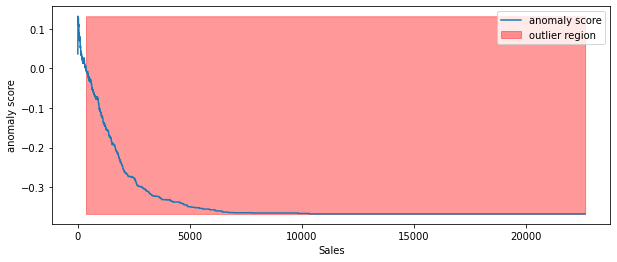

Sales that exceeds 1000 would be considered as an outlier.

More examples of IsolationForest in Tutorial_4

### Multivariate outlier determination
- - refer to Tutorial_4, 5, 6, 7, 8

In [ ]:
knn=KNN(contamination=outlier_fraction)
knn.fit(X_train)
# prediction labels and outlier scores of the training data
y_train_pred = knn.labels_  
y_train_scores = knn.decision_scores_ 
# prediction on the test data
y_test_pred = knn.predict(X_test)  
y_test_scores = knn.decision_function(X_test)
# errors in test set
n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
# accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

In [ ]:
from pyod.utils import example
example.visualize(knn, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

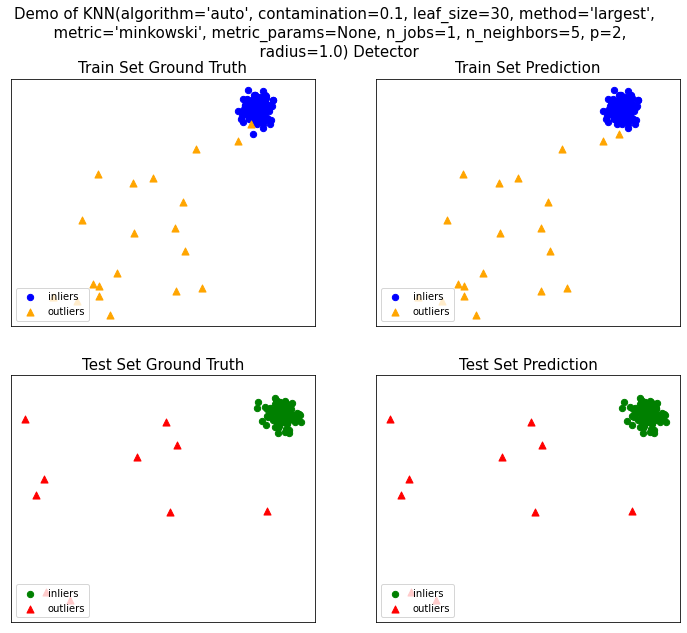

## 3. Decide to Delete, Keep or Process Outliers

Think need to examine what the data means in the real world and which machine learning models will be using with it.

Look at:
- size of sample
    - if large dataset and deleting doesn't affect model, can delete
    - if small dataset and deleting affects model, be careful deleting
- methodology
    - if outlier likely to be a result of how the data was gathered, keep outlier
    - If outliers are however, introduced due to mechanical error, measurement error or anything else that can't be generalised, it is a good idea to remove these outliers before feeding the data to the modeling algorithm. Why? Because some algorithms are sensitive to outliers
- character of data
    - if real world phenomen, and risk to life (eg.), then keep outlier since might contain critical information
    - Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values
- occurrence
    - if so far outside what is normal for dataset, then safe to delete outlier
- if outlier creates a relationship where there isnt one either, be careful

###### Which machine learning models are sensitive to outliers?

NOT SENSITIVE
- Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= a certain value, and therefore the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

SENSITIVE
- AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.
- Linear models, in particular Linear Regression, can be also sensitive to outliers.
- recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. 

## 3. Process Outliers

- run MODEL with and without outlier, if substancial change, then be careful

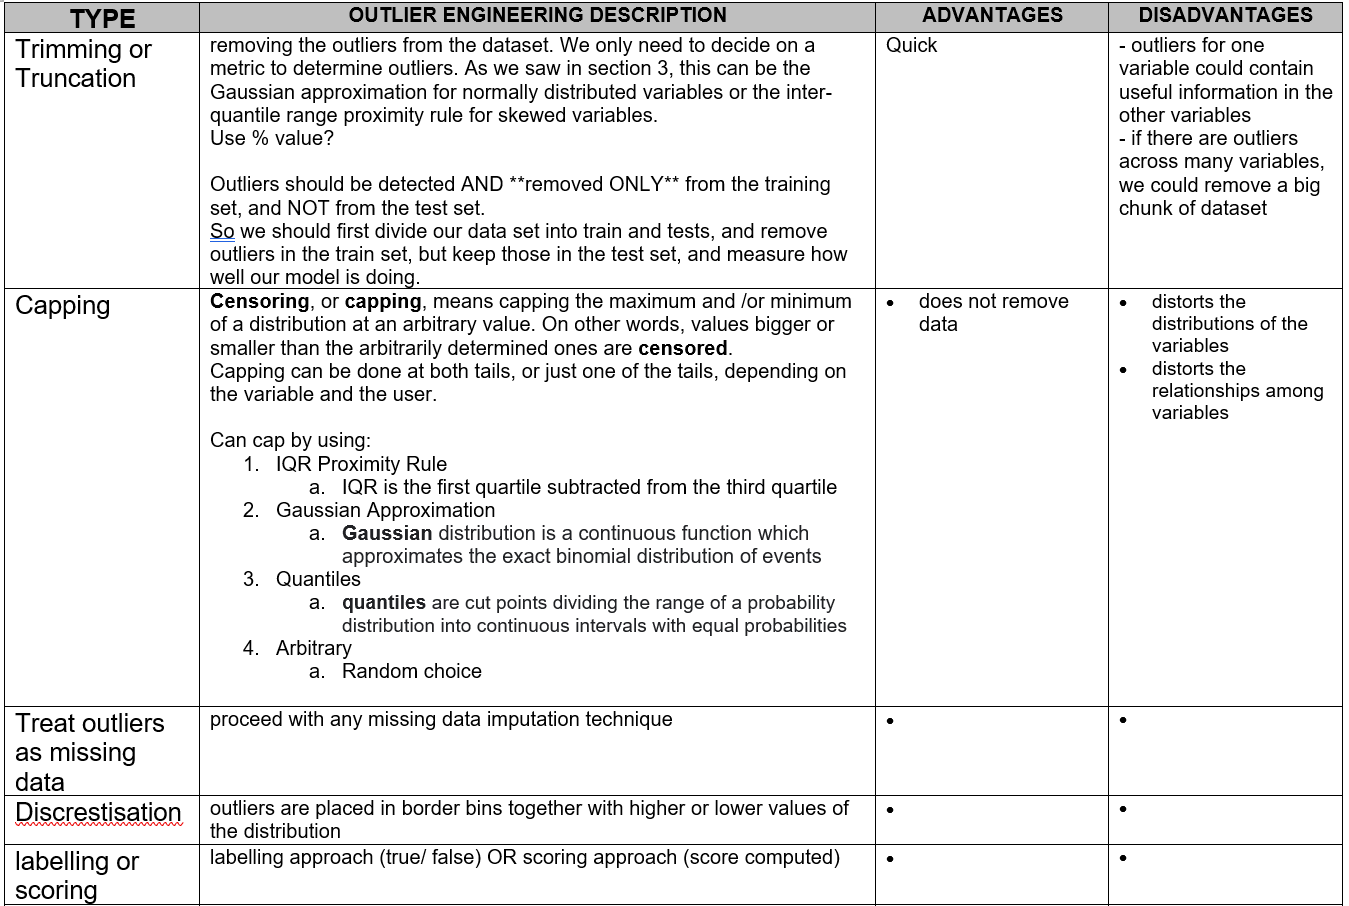

# --------------------------------------------------------------------------------------------------------------

### CATEGORICAL DATA

The number of different labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.

CARDINALITY = within a column of a dataframe, the NUMBER of different values

- eg. gender column is low cardinality because it just has male & female
- eg. postal code column can be high cardinality because it can have many different postal codes
High cardinality may pose the following problems:

Variables with too many labels tend to dominate over those with only a few labels, particularly in Tree based algorithms.
A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to over-fit.
Some of the labels may only be present in the training data set, but not in the test set which causes overfitting to train set. Or vice versa with labels only in the test set which cause machine learning algorithms unable to perform a calculation over the new (unseen) observation.
Can reduce through feature engineering.

In [ ]:
# Display cardinality for CATEGORICAL variables - this is the number different labels
print('Number of categories in the variable Name: {}'.format(
    len(data.name.unique())))
print('Number of categories in the variable Gender: {}'.format(
    len(data.sex.unique())))
print('Total number of passengers in the Titanic: {}'.format(len(data)))

# In this case, the variable sex contains only 2 categories while name contains a huge number of different labels (high cardinality).

In [ ]:
# Can reduce cardinality through feature engineering
# As an example, the cabin variable consists of a letter then number.
# The first letter indicates the deck on which the cabin was located so that can be extracted to reduce # of variables.
# let's capture the first letter of Cabin
data['Cabin_reduced'] = data['cabin'].astype(str).str[0]
data[['cabin', 'cabin_reduced']].head()

In [ ]:
# Can determine labels present only in the training set for Cabin_reduced
unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]
len(unique_to_train_set)

# Can determine labels present only in the test set for Cabin
unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]
len(unique_to_test_set)

May introduce missing variables in the test set when use feature engineering techniques from train set. This is because the variables may not be present in both test and train sets.

## For categories - Rare Labels
Categorical variables often contain a few dominant labels and a large number of labels that appear only seldom (OR rare labels).

RARE LABELS = within a column of a dataframe, a rare value is one that doesn't occur very often
    - eg.  gender column may have a rare label if female shows up only once while male shows up the other 99 times

Problems with rare labels:
- Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
- A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.
- Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
- Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

**Note** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

Can reduce through feature engineering.

In [ ]:
# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

In [ ]:
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of houses in the data
# with each label

total_houses = len(data)

# for each categorical variable
for col in cat_cols:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

Determine if there is a way to group values based on another column. For example, in the following code, see if all the rare values locations are in expensive neighbourhoods then they can be grouped together. 

In [ ]:
# the following function calculates:
# 1) the percentage of houses per category
# 2) the mean SalePrice per category

def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [ ]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

In [ ]:
# Create a function to plot the category frequency and mean SalePrice.
# Helps visualise the relationship between the target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()
    
plot_categories(temp_df, 'Neighborhood')

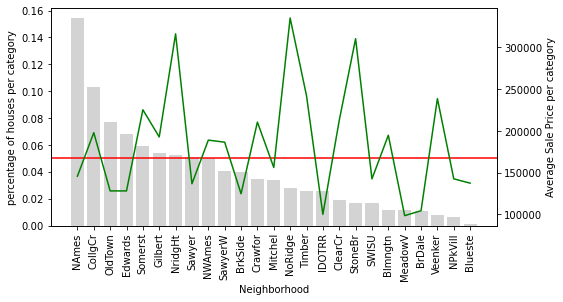

The red line is the 5% line. Categories under this are rare. For these rare categories, there doesn't seem to be a correlation of ave sale price to the neighbourhood. Thus, average sale price cannot be used to group them together. Try another variable instead of average sale price per category.

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. 

In [ ]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):
    total_houses = len(df)
    temp_df = pd.Series(df[var].value_counts() / total_houses) # first I calculate the % of houses for each category 

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    tmp = df[var].map(grouping_dict) # now I replace the rare categories
    return tmp

# group rare labels in Neighborhood
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')
data[['Neighborhood', 'Neighborhood_grouped']].head(10)

In [ ]:
# let's group and plot the remaining categorical variables

for col in cat_cols[1:]:
    data[col+'_grouped'] = group_rare_labels(data, col) # re using the functions I created
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')